# Capstone Project: Analysing 911 Calls 

#### This project analysed 911 calls from kaggle. The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

### You can check the dataset from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).

## Setting up important libraries

In [61]:
import numpy as np
import pandas as pd

## Import Visualization libraries and set %matplotlib inline

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read  csv file as dataframe called 'df'

In [65]:
df = pd.read_csv('911.csv')

In [66]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


- **Step 1: Extract the top 5 zipcodes.**

In [69]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

- **Step 2: Extract the top 5 townships (twp) for 911 calls**

In [71]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

- **Step 3: Evaluate the 'title' column to see how many unique title codes are there**

In [73]:
df['title'].nunique()

110

- Alternatitively I could also do:

In [74]:
len(df['title'].unique())

110

- In the title column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. 

- Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

- For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. 

### Breakdown logic and set the function to 'x'

In [76]:
x = df['title'].iloc[0]

In [77]:
x

'EMS: BACK PAINS/INJURY'

- Now I will grab the 'EMS' using the .split() function to create a list. Ensure to split at ':'

In [78]:
x.split(':')

['EMS', ' BACK PAINS/INJURY']

- Now I will grab the first element of the list

In [79]:
x.split(':')[0]

'EMS'

- Use the 'lambda expression'

In [80]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [81]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

- **Based on the new insight, I can now see the most common Reason for 911 call**

In [83]:
df['Reason'].value_counts() 

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

- This shows that 'EMS' is the most common reason for 911 calls
- Next I will use seaborn to create a countplot of 911 calls by reason for easy visualisation

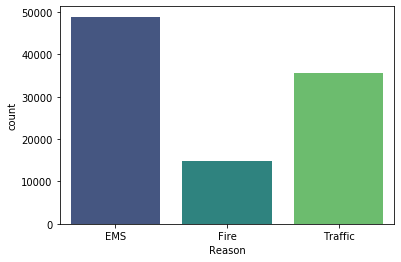

In [87]:
sns.countplot(df['Reason'],palette='viridis')

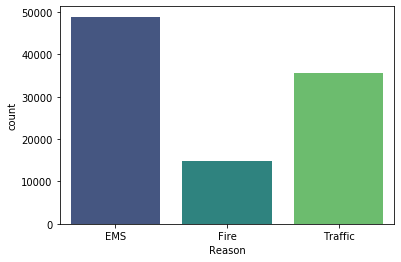

In [88]:
#or 
sns.countplot(x='Reason',data=df,palette='viridis')

- **Step 4: I will focus on time information, for example extracting the data type of the objects in the timeStamp column.** 
- Use .info() to get data type

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
Reason       99492 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


- Now I can see that the data type of 'timeStamp' is actually a 'string' 
- To confirm that further:

In [93]:
df['timeStamp'].iloc[0]

'2015-12-10 17:40:00'

- Alternatively, I could also do

In [ ]:
type(df['timeStamp'].iloc[0])

- Use 'pd.to_datetime' to convert the 'timeStamp' column from strings to DateTime objects
- More Info: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

In [106]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

- Now if we take a look at the 'timeStamp object' we will see the transformation 

In [108]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

- Now I can grab specific attributes from the Datetime object by calling them. For example:
- Using `time = df['timeStamp'].iloc[0]`
- Also `time.hour`

### Note that I can also use Jupyter's tab method to explore the various attributes available to call. 
- Now that the timestamp column is transformed to DateTime objects, I can now use .apply() to create 3 new columns called Hour, Month, and Day of the Week creating these columns based off of the timeStamp column

In [111]:
time = df['timeStamp'].iloc[0]

In [112]:
time.hour

17

-  Tips: to know the differnt calls available, you can type for example 'time.(shift)'

In [ ]:
time.year

In [115]:
time.dayofweek

3

- **Step 5: Now I will go ahead and create the hour and day of week column** 

In [118]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [119]:
df['Hour']# All the hours the actual call occured

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 99492, dtype: int64

- **Step 6: I will create the 'Month and Dayofweek' column**

In [ ]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

- Evaluate the DataFrame to see created column 

In [122]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


- **Notice how the DayofWeek is represented as an integer 0-6. I will use .map() with this dictionary to map the actual string names to the Day of Week.**
- For example `dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}`

In [123]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [124]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [125]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


- Now the Day of Week is mapped in 'Mon-Sun' format
- Next I will use seaborn to create a countplot for the Day of Week column with the hue based off of the Reason column.

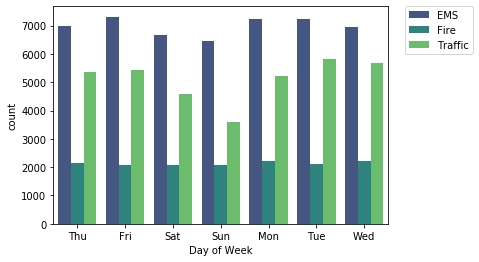

In [163]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1), borderaxespad=0.)
plt.show()

- I will create countplot for the Month

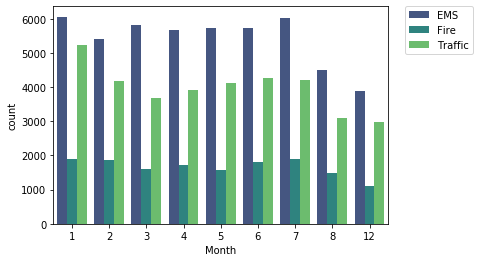

In [165]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)

- I can notice something strange about the Plot for the Month. Notice that Month '9,10,11' is missing

- So next, I will see if I can fill in this missing information by plotting the information in a different way, possibly a simple line plot that fills in the missing months, in order to do this, I will need to do some work with pandas

- **Step 7: I will create a 'gropuby object called byMonth', where I can group the DataFrame using the month column and use the .count() method to aggregate. Use the .head() method on the returned DataFrame**

In [168]:
byMonth = df.groupby('Month').count()

In [171]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


- I will assume that if we have the latitude of the call then the call actually did happen 
- Next I am going to create a simple plot of the dataframe indicating the count of calls per month.

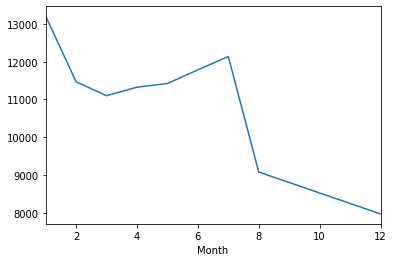

In [173]:
byMonth['lat'].plot()

- **Step 8: I will now use seaborn's '.lmplot()' to create a linear fit model on the number of calls per month Keeping  in mind that I may need to reset the index to column.**
- Notice that in the data 'byMonth' we do not have the Month column. The index column is the Month, so I will try to rest that

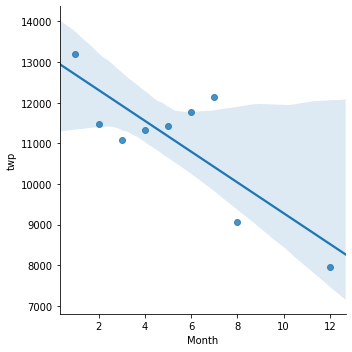

In [175]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

- Now I will take a look at the reset index 

In [187]:
byMonth.reset_index()# Notice that I now have the month column 

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [188]:
z = byMonth.reset_index()

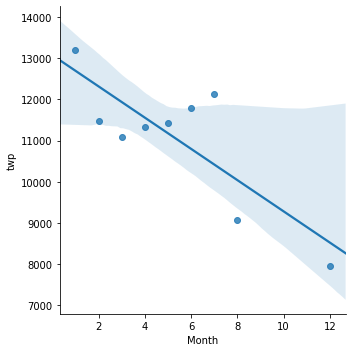

In [189]:
sns.lmplot(x='Month',y='twp',data=z)

- Step 9: I will create a new column called 'Date' that contains the date from the timeStamp column with **.date() method**

In [193]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


In [204]:
t = df['timeStamp'].iloc[0]

In [205]:
t

Timestamp('2015-12-10 17:40:00')

In [206]:
t.date() # Now I have created the dates from 'timeStamp'

datetime.date(2015, 12, 10)

- Now I will create the Date Column

In [229]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [230]:
df.head()#now I have the Date column 

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


- Step 10: I will use **'groupby'** and **.count()** to aggregate and create a plot of counts for 911 calls

In [231]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


- Next I will grab the 'latitude column'

In [232]:
df.groupby('Date').count()['lat']

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: lat, Length: 259, dtype: int64

Text(0.5, 1, 'Latitude')

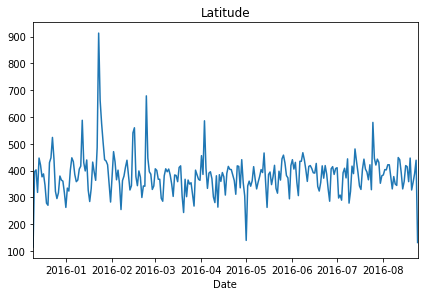

In [242]:
#plotting the latitude column 
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Latitude')

- **Step 11: Next I will recreate the plot in separate plots with each plot representing a Reason for the 911 call**

In [239]:
df['Reason'].value_counts()# creating 3 different plots for each of these reason

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Text(0.5, 1, 'Traffic')

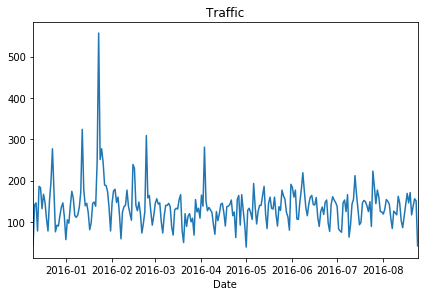

In [243]:
#Here similar to the plot above I will use a conditional selection to make the three separate plots for the Reasons

df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic')

Text(0.5, 1, 'Fire')

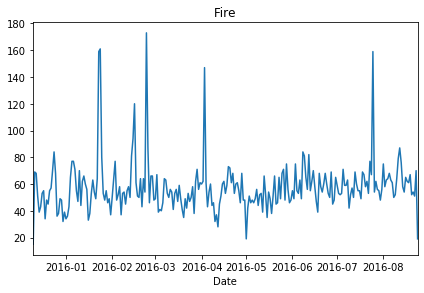

In [244]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Fire')

Text(0.5, 1, 'EMS')

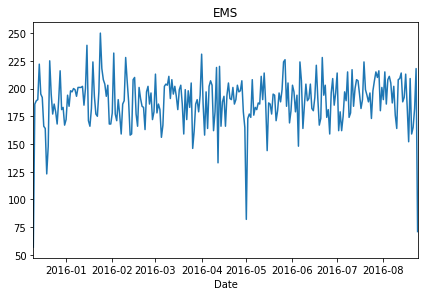

In [245]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('EMS')

- **Step 12: Next I will create heatmaps with seaborn and using the data.** 
- But firsr I will need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method.
- First using 'groupby' to make list 
- Using the unstack method. Note that I will need my data in matrix form

In [252]:
df.groupby(by=['Day of Week', 'Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19    686  686   686  590    686        686  686   682  686   
            20    668  668   668  597    668        668  668   662  668   
            21    575  575   575  508    575        575  574   572  575   
            22    490  490   490  432    490        490  490   485  490   
            23    335  335   335  294    335        335  334   335  335   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201  
...                  ...    ...   ...  
Wed         19       686    686   686  
            20       668    668   668  
            21       575    575   575  
            22       490    490   490  
            23       335    335   335  

[168 rows x 12 columns]

- Now I will add the Reasons column 

In [253]:
df.groupby(by=['Day of Week', 'Hour']).count()['Reason']

Day of Week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wed          19      686
             20      668
             21      575
             22      490
             23      335
Name: Reason, Length: 168, dtype: int64

- Use the 'unstack' argument to convert the columns to matrix form

In [263]:
hmap = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

In [265]:
hmap

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


- Notice that the above function converted the Hour columns into '0-23'
- Note, I can also use the 'Pivot' to create the same table 
- Next, I will create a heatmap

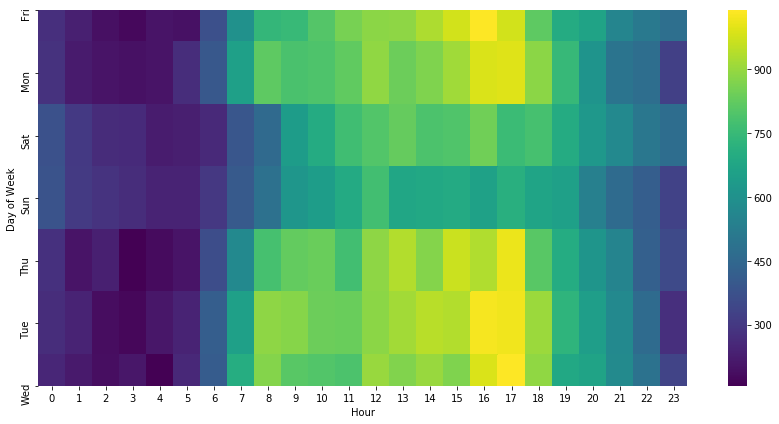

In [271]:
plt.figure(figsize=(12,6))# to make the figure size a little bigger
sns.heatmap(hmap,cmap='viridis')
plt.tight_layout()

- Create a clustermap for the DataFrame.

<Figure size 864x432 with 0 Axes>

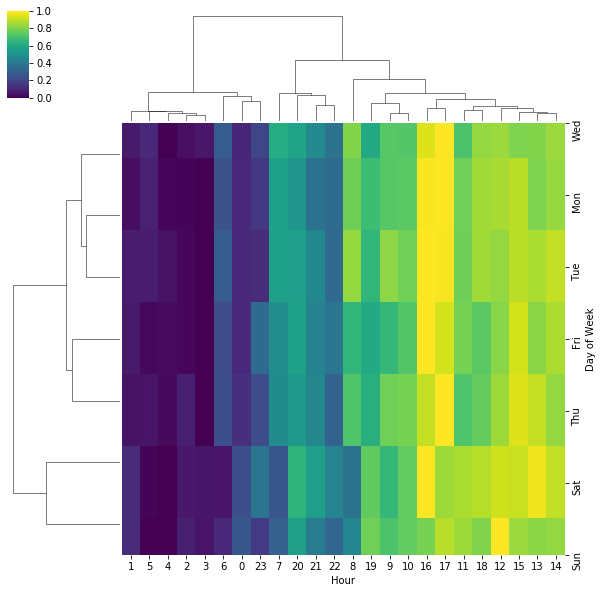

In [276]:
plt.figure(figsize=(12,6))
sns.clustermap(hmap,cmap='viridis',standard_scale=0.5)

- **Step 13: I will repeat these same plots and operations, for the DataFrame that shows the Month as the column.** 

In [278]:
df.groupby(by=['Month', 'Hour']).count()['Reason']

Month  Hour
1      0       294
       1       218
       2       225
       3       205
       4       205
              ... 
12     19      419
       20      361
       21      305
       22      286
       23      204
Name: Reason, Length: 216, dtype: int64

In [280]:
hmap2 = df.groupby(by=['Month', 'Hour']).count()['Reason'].unstack()

In [281]:
hmap2

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
1,294,218,225,205,205,214,386,551,755,752,...,775,691,725,871,798,687,592,507,421,345
2,267,194,161,149,161,213,325,550,597,603,...,648,704,692,674,693,578,518,453,426,327
3,214,181,194,149,152,181,291,487,556,614,...,672,707,782,676,600,547,493,402,359,273
4,243,204,170,161,179,178,316,482,613,598,...,705,728,767,728,646,533,472,377,309,282
5,255,195,158,173,160,196,254,439,605,644,...,640,746,728,787,608,510,489,462,405,283
6,229,192,168,157,148,172,290,436,565,630,...,726,767,817,769,693,563,496,456,399,306
7,241,224,181,188,177,196,279,431,545,635,...,791,744,815,826,675,652,583,481,433,292
8,219,182,166,135,131,144,188,326,466,465,...,552,612,656,564,476,419,373,345,245,247
12,150,131,126,118,105,135,184,268,342,373,...,488,455,508,622,573,419,361,305,286,204


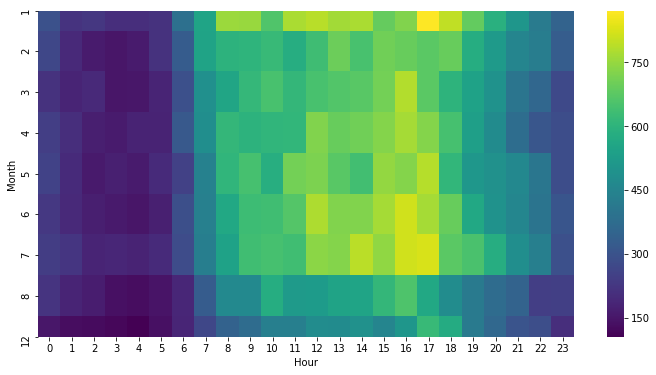

In [284]:
plt.figure(figsize=(12,6))
sns.heatmap(hmap2,cmap='viridis')

<Figure size 864x432 with 0 Axes>

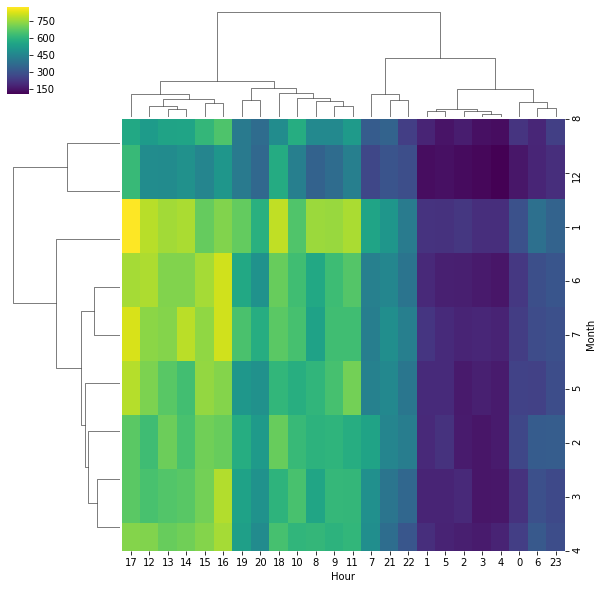

In [286]:
plt.figure(figsize=(12,6))
sns.clustermap(hmap2,cmap='viridis')

- Create a heatmap for 'Day of Week' and 'Month'

In [287]:
hmap3 = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()

In [288]:
hmap3

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


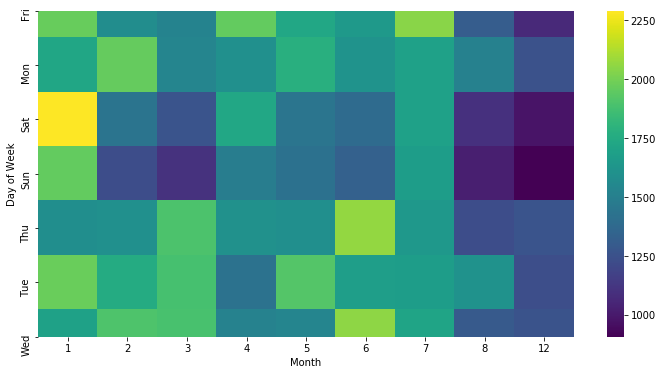

In [290]:
plt.figure(figsize=(12,6))
sns.heatmap(hmap3,cmap='viridis')

<Figure size 864x432 with 0 Axes>

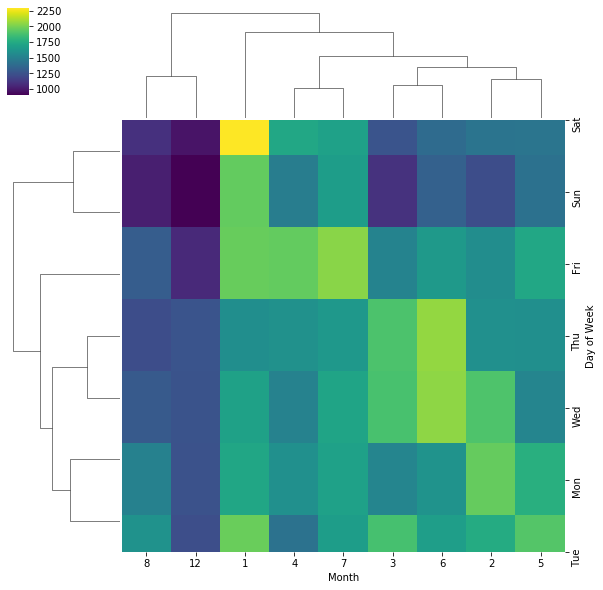

In [289]:
plt.figure(figsize=(12,6))
sns.clustermap(hmap3,cmap='viridis')

## Great Job!